In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from time import perf_counter

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(train_images.shape)

(50000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

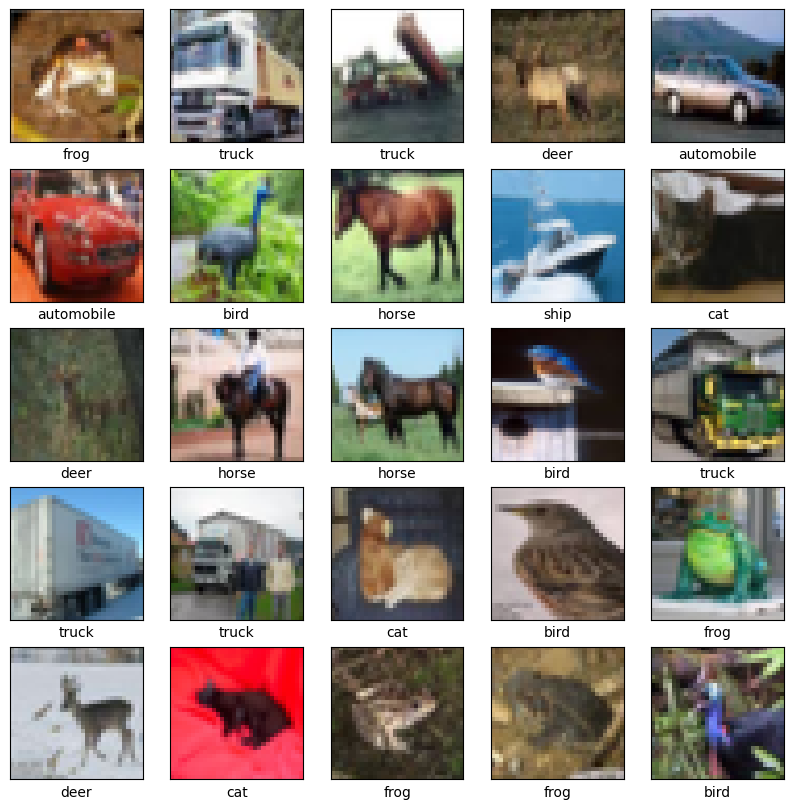

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.savefig('image_samples.png')

In [ ]:
model =   tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

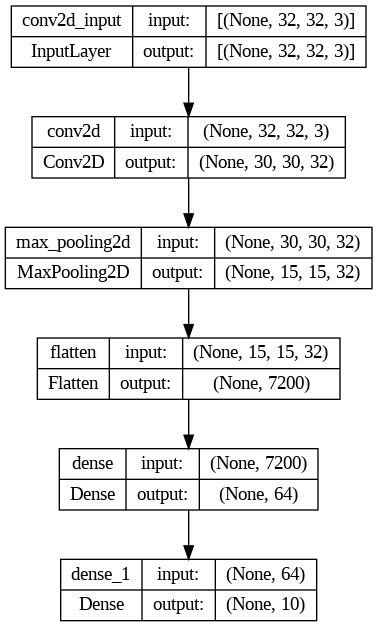

In [ ]:
tf.keras.utils.plot_model(model, to_file="cnn_model.png", show_shapes=True)

In [ ]:
model.save('untrained-cnn-model')

In [ ]:
model = tf.keras.models.load_model('untrained-cnn-model')

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [ ]:
tic = perf_counter()#start training timer
history = model.fit(train_images,
                    train_labels,
                    epochs=15,
                    validation_data=(test_images, test_labels)
                    )
toc = perf_counter()# stop training timer
training_time = toc-tic #calculate total training time

Epoch 1/15
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5720 - accuracy: 0.4244 - val_loss: 1.2859 - val_accuracy: 0.5431
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2081 - accuracy: 0.5697 - val_loss: 1.1478 - val_accuracy: 0.5990
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0743 - accuracy: 0.6211 - val_loss: 1.0940 - val_accuracy: 0.6182
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9872 - accuracy: 0.6524 - val_loss: 1.0075 - val_accuracy: 0.6509
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9254 - accuracy: 0.6775 - val_loss: 1.0019 - val_accuracy: 0.6485
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8757 - accuracy: 0.6931 - val_loss: 0.9849 - val_accuracy: 0.6598
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8340 - accuracy: 0.7082 - val_loss: 0.9352 - val_accuracy

In [ ]:
model.save('trained-cnn-model-conf3')

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('cnn-training-history-conf3.csv')
np.savetxt('training_time_epoch_conf3.csv', [training_time], delimiter=',')

In [ ]:
history = pd.read_csv('cnn-training-history-conf2-1.csv')

In [ ]:
history

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.555905,0.43148,1.280127,0.5454
1,1,1.209428,0.57242,1.154974,0.5923
2,2,1.076769,0.62352,1.081055,0.6241
3,3,0.995732,0.65120,1.022632,0.6350
4,4,0.932750,0.67266,1.010012,0.6379
5,5,0.877020,0.69324,0.968969,0.6601
6,6,0.836617,0.70488,0.937809,0.6758
7,7,0.798854,0.71928,0.918651,0.6871
8,8,0.766853,0.73106,0.949204,0.6755
9,9,0.732020,0.74402,0.906247,0.6913


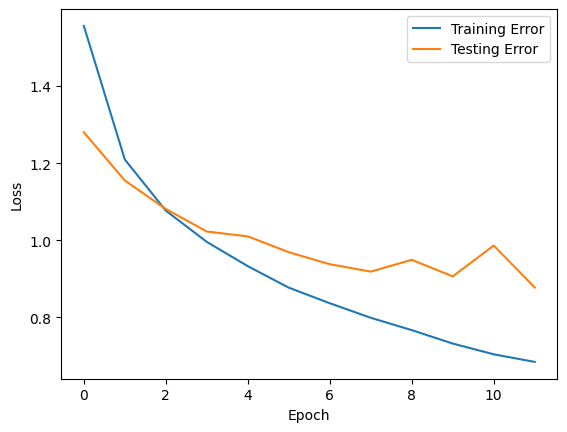

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
### Import TensorFlow
"""
import matplotlib.pyplot as plt
import pandas as pd #we will use this to save the training log

"""
We first load the training log
"""
history = pd.read_csv('cnn-training-history-conf2-1.csv')


"""
### We can see the training accuracy and testing accuracy as follows.
"""
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('accuracy-plot-conf2-1.png')
plt.clf()


"""
### We can see the training and testing error as follows.
"""
plt.plot(history['loss'], label='Training Error')
plt.plot(history['val_loss'], label = 'Testing Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')
plt.savefig('loss-plot-conf2-1.png')

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
This script downloads the CIFAR dataset and displays some its images.
[CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). """

"""
### Import TensorFlow
"""
import tensorflow as tf
import matplotlib.pyplot as plt
"""

### Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each
class. The dataset is divided into 50,000 training images and 10,000 testing images. The
classes are mutually exclusive and there is no overlap between them.  """

# This function will download the data into the $HOME/.keras/datasets directory.
# If the data already exists, it will not redownload.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


"""
## We first create a plot that shows a few images from the trianing dataset. In more complex scenarions,
you may run additional analysis of your dataset.
"""

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.savefig('image_samples.png')

In [ ]:
"""
This file is based on the TensorFlow tutorials
"""
"""
### Import TensorFlow
"""
import tensorflow as tf

"""
### Create the convolutional neural network model.
"""

"""
The 6 lines of code below define the convolutional base. That is, the convolution layers of our CNN.
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring
the batch size. If you are new to these dimensions, color_channels refers to (Red,Green,Blue). In this
example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the
format of CIFAR images (i.e., 32x32 pixel colored images). You can do this by passing the
argument `input_shape` to your first layer.
"""

""" By using the Sequential() class, this code builds the convolutional network layer by layer  """
model =   tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


"""
You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor (i.e., three 2D
matrices stacked on top of each other) of
shape (height, width, channels). The width and height dimensions tend to shrink as you go
deeper in the network. The number of output channels for each Conv2D layer is controlled by the
first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford
(computationally) to add more output channels in each Conv2D layer.  """
"""

## Add Dense layers on top
The above model defines a convolutional neural network with two convolutional layers (convolution
operaion+pooling operation).
To complete the model, you will feed the last output tensor from the convolutional neural network (of
shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take
vectors as input (which are 1D), while the current output is a 3D tensor. First, you will
flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has
10 output classes, so you use a final Dense layer with 10 outputs.  """

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

"""
The final output layer with 10 neurons. Each neuron gives the a
probability of how likely the input image is to belong to the class that corresponds to the
neuron.
"""

"""
We can verify that we are building the model we want by displaying a summary of the layers
"""
model.summary()

"""
We can also verify the model by observing a diagram
Pydot can be installed by running "pip install pydot"
"""
tf.keras.utils.plot_model(model, to_file="cnn_model.png", show_shapes=True)

"""
We save the model to train it later
"""
model.save('untrained-cnn-model')



In [ ]:
"""
This file is based on the TensorFlow tutorials
"""

"""
### Import TensorFlow
"""
import tensorflow as tf
import pandas as pd
import numpy as np
from time import perf_counter


"""
Load our untrained CNN model
"""
model = tf.keras.models.load_model('untrained-cnn-model')

"""
We load the training and testing data and normalize it. Normalizaing helps with numerical stability
"""
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

"""
Next, we define the training algorithm. In this case, we are using the ADAM algorithm. This is the most
commonly used one.

We also define categotical cross-entropy as the loss function. This is the same
as the cross-entropy covered in class. However, we sum the probabilities over all categories.

Finally, we define the performance metric. In this case, we are interested in how many images are being
classified correctly. Thus, we use accuracy.
"""
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

"""
The next function performs the actual training.
"""
tic = perf_counter()#start training timer
history = model.fit(train_images,
                    train_labels,
                    epochs=1,
                    validation_data=(test_images, test_labels)
                    )
toc = perf_counter()# stop training timer
training_time = toc-tic #calculate total training time

"""
Finally, we save the training log, trining time, and the trained model for later analysis
"""
model.save('trained-cnn-model')

history_df = pd.DataFrame(history.history)
history_df.to_csv('cnn-training-history.csv')
np.savetxt('training_time.csv', [training_time], delimiter=',')